In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("E:\Major Project\supermarket_sales.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
print("Missing values per column:\n", data.isnull().sum())
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

Missing values per column:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Number of duplicate rows: 0


In [4]:
print("\nData types before conversion:\n", data.dtypes)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    print("\nDate column converted to datetime format.")


Data types before conversion:
 Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Date column converted to datetime format.


In [5]:
for col in data.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}' column:", data[col].unique())


Unique values in 'Invoice ID' column: ['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-2234' '199-75-8169' '853-23-2453'
 '877-22-3308' '838-78-4295' '109-28-2

In [6]:
pip install matplotlib seaborn


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

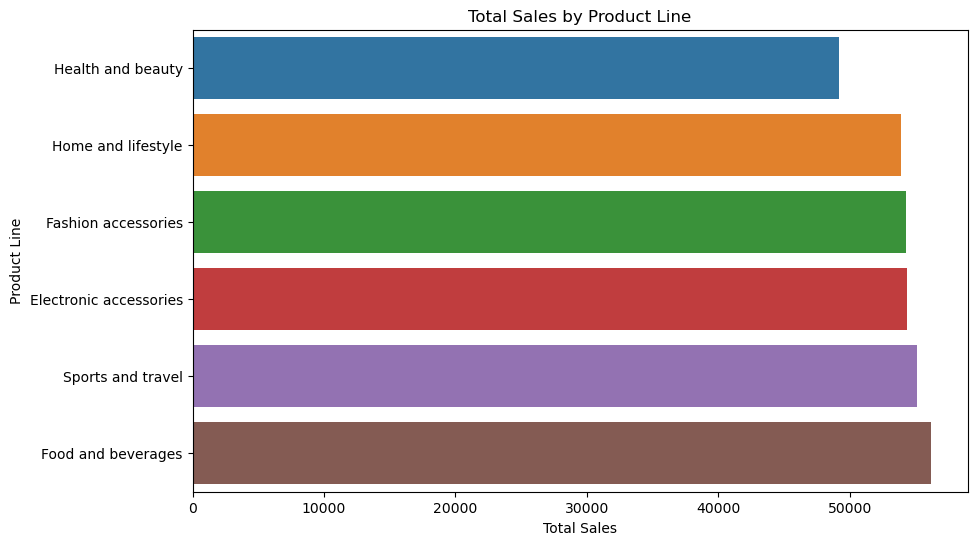

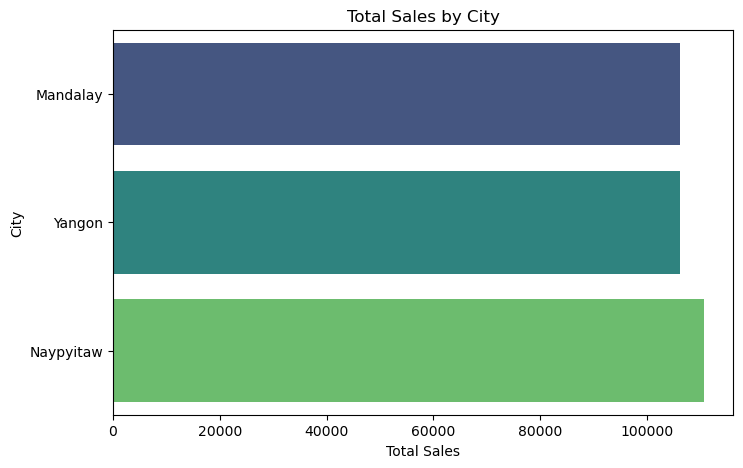

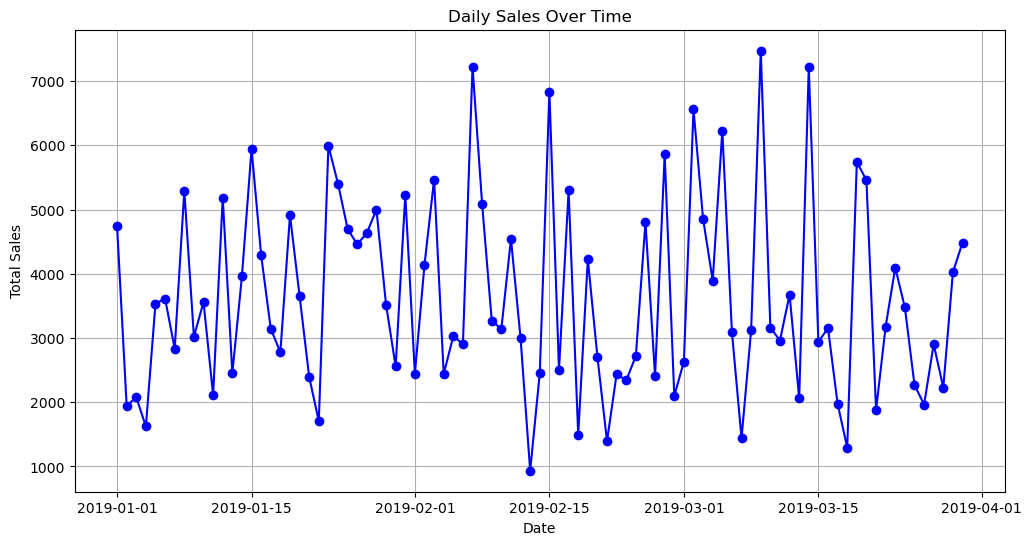

In [8]:
product_sales = data.groupby('Product line')['Total'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales, y=product_sales.index)
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()


city_sales = data.groupby('City')['Total'].sum().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=city_sales, y=city_sales.index, palette='viridis')
plt.title('Total Sales by City')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()


if 'Date' in data.columns:
    daily_sales = data.groupby('Date')['Total'].sum()
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales.index, daily_sales.values, marker='o', color='b')
    plt.title('Daily Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()


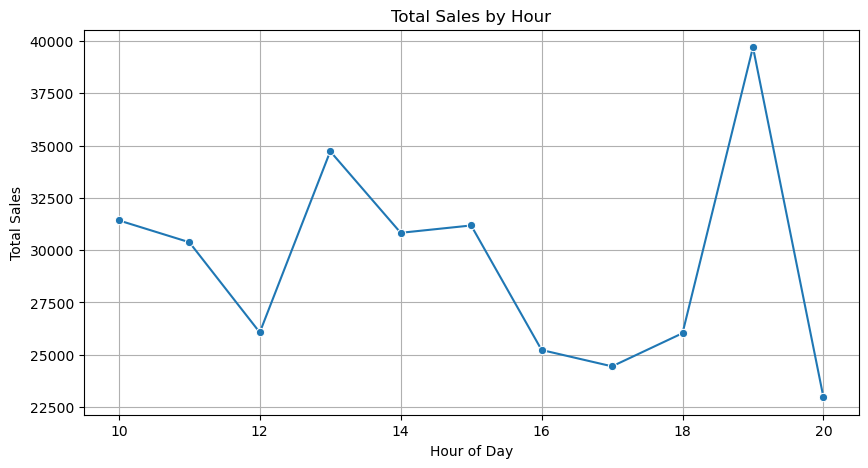

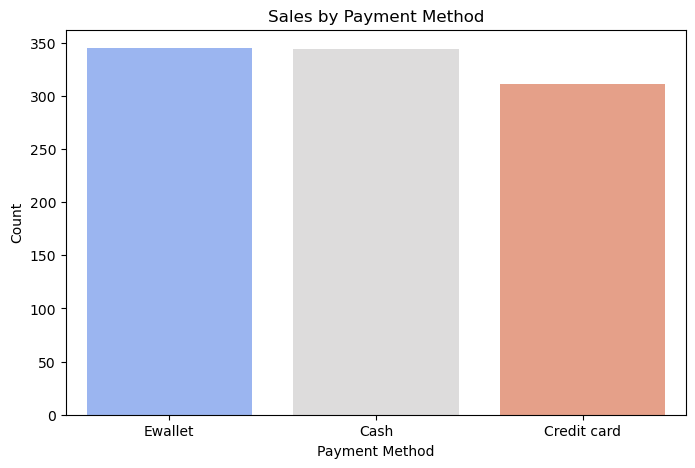

In [9]:
if 'Time' in data.columns:
    
    data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour
    hourly_sales = data.groupby('Hour')['Total'].sum()
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
    plt.title('Total Sales by Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()


payment_sales = data['Payment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_sales.index, y=payment_sales.values, palette='coolwarm')
plt.title('Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

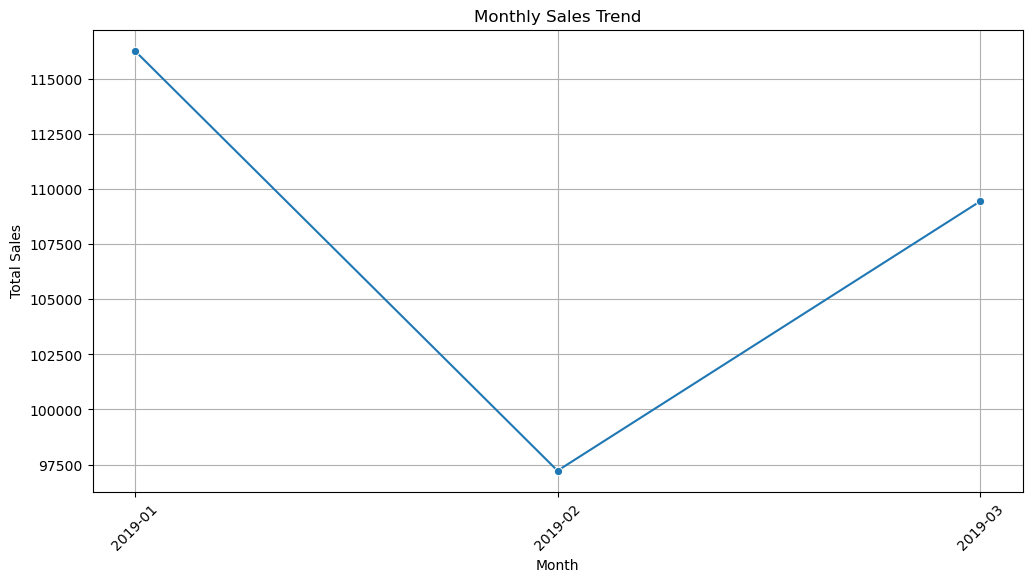

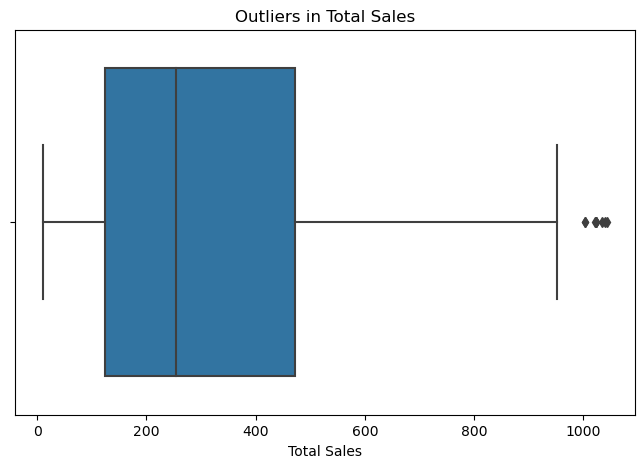

In [10]:
if 'Date' in data.columns:
    data['Month'] = data['Date'].dt.to_period('M')
    monthly_sales = data.groupby('Month')['Total'].sum()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Total'])
plt.title('Outliers in Total Sales')
plt.xlabel('Total Sales')
plt.show()

In [11]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [13]:
data['Date'] = pd.to_datetime(data['Date'])
sales_data = data.set_index('Date').resample('D')['Total'].sum()  
print(sales_data.head())

Date
2019-01-01    4745.1810
2019-01-02    1945.5030
2019-01-03    2078.1285
2019-01-04    1623.6885
2019-01-05    3536.6835
Freq: D, Name: Total, dtype: float64


In [14]:
model = ARIMA(sales_data, order=(1, 1, 1))
arima_result = model.fit()


print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   89
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -771.924
Date:                Thu, 27 Mar 2025   AIC                           1549.849
Time:                        12:39:05   BIC                           1557.281
Sample:                    01-01-2019   HQIC                          1552.843
                         - 03-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0393      0.123     -0.318      0.750      -0.281       0.203
ma.L1         -0.9999      0.175     -5.718      0.000      -1.343      -0.657
sigma2      2.318e+06   7.56e-08   3.07e+13      0.0

In [15]:
forecast = arima_result.forecast(steps=30)
print("\nForecasted Sales for the Next 30 Days:\n", forecast)


Forecasted Sales for the Next 30 Days:
 2019-03-31    3566.321227
2019-04-01    3602.484755
2019-04-02    3601.064372
2019-04-03    3601.120160
2019-04-04    3601.117969
2019-04-05    3601.118055
2019-04-06    3601.118052
2019-04-07    3601.118052
2019-04-08    3601.118052
2019-04-09    3601.118052
2019-04-10    3601.118052
2019-04-11    3601.118052
2019-04-12    3601.118052
2019-04-13    3601.118052
2019-04-14    3601.118052
2019-04-15    3601.118052
2019-04-16    3601.118052
2019-04-17    3601.118052
2019-04-18    3601.118052
2019-04-19    3601.118052
2019-04-20    3601.118052
2019-04-21    3601.118052
2019-04-22    3601.118052
2019-04-23    3601.118052
2019-04-24    3601.118052
2019-04-25    3601.118052
2019-04-26    3601.118052
2019-04-27    3601.118052
2019-04-28    3601.118052
2019-04-29    3601.118052
Freq: D, Name: predicted_mean, dtype: float64


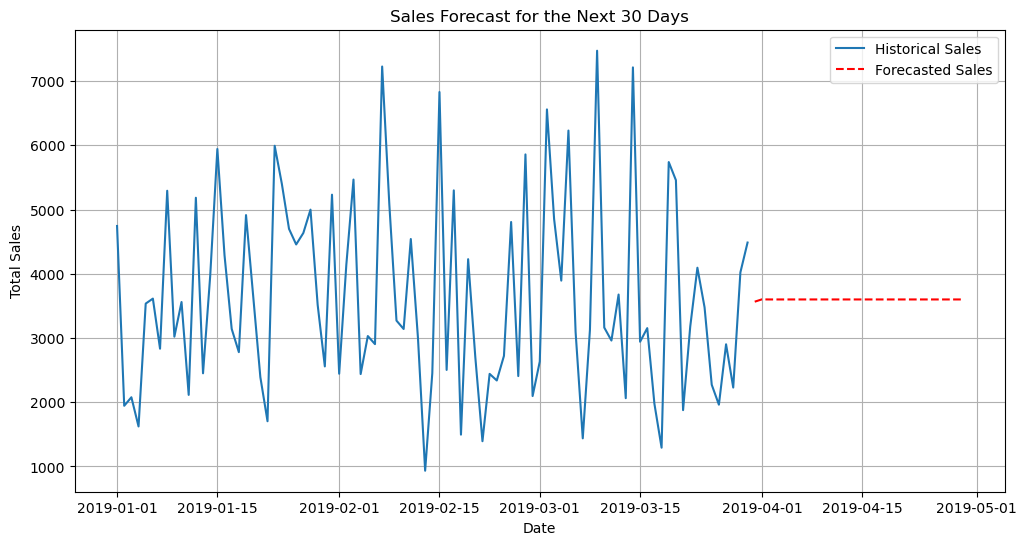

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data, label='Historical Sales')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red', linestyle='--')
plt.title('Sales Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("supermarket_sales.csv")

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target
features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 
            'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 
            'Year', 'Month', 'Day', 'Hour']
target = 'Total'

# Normalize features
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Sort data by date
df = df.sort_values(by=['Date', 'Hour'])

# Prepare input and target variables
X = df[features].values
y = df[target].values.reshape(-1, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for GRU input
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the GRU model
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(1, 16)),
    Dropout(0.2),
    GRU(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate model performance
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", loss)
print("Mean Absolute Error:", mae)


C:\Users\K GIRISH\AppData\Local\Temp\ipykernel_8784\128194701.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


Epoch 1/100

50/50 [==============================] - 8s 26ms/step - loss: 166745.7188 - mae: 324.8777 - val_loss: 151719.1406 - val_mae: 308.2466
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 160716.4688 - mae: 315.9765 - val_loss: 143481.1875 - val_mae: 294.4934
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 152683.1562 - mae: 302.7171 - val_loss: 136282.3125 - val_mae: 282.2211
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 144662.6562 - mae: 290.0219 - val_loss: 128626.2188 - val_mae: 269.0800
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 136816.3906 - mae: 277.4591 - val_loss: 120784.6328 - val_mae: 255.9826
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 127969.4375 - mae: 264.1483 - val_loss: 112422.8594 - val_mae: 242.5078
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 119350.7734 - mae: 251.4854 - val_loss: 104118.9062 - v

In [42]:
from sklearn.metrics import r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Compute R² score
r2 = r2_score(y_test, y_pred)

print(f"R² Score (Accuracy): {r2 * 100:.2f}%")


7/7 [==============================] - 1s 3ms/step
R² Score (Accuracy): 99.77%
